Date: May 24, 2023 <br>
Author: Dan Segal <br>
Github: @[djsegal](https://github.com/djsegal/zelus_assessment)

# Zelus Assessment

## Part 1: Data Analysis (cont.)

---

# Question 3

More generally and unrelated to cricket or the previous questions, model deployment in a production environment is an important aspect of an engineer’s toolkit. Describe a scalable architecture (a diagram may be helpful) that would be appropriate for deploying a model that predicts frame-level play values into a cloud environment with the following assumptions:

+ Spatial temporal high frame-rate data (~1 GB per game)
+ Play-values are predicted at each frame of a game
+ Delivery of game predictions are expected to be delivered overnight
+ 500 games per season with 50 games a day
+ 5 seasons of existing data
+ Model training resources: 8 hour runtime with multiple cores (8) and large memory usage
+ Model prediction resources: 60 min runtime per game with a single CPU and 4 GB of memory usage

List out the services, tooling, and reasoning for the choices of architecture. For example, a LAMP stack could be appropriate for an internal home network webpage on a Raspberry Pi.

# Answer 3

## Architecture

### Services:

+ Amazon S3 (Simple Storage Service): For storage of game data and model parameters.
+ Amazon SageMaker: For model training and prediction.
+ AWS Lambda: For event-driven processing.
+ Amazon SQS (Simple Queue Service): For task queuing and managing game processing.
+ Amazon CloudWatch: For monitoring services.
+ Amazon RDS (Relational Database Service): For storing metadata and results.
+ AWS Glue: For data extraction, transformation, and load operations.

### Architecture Diagram:

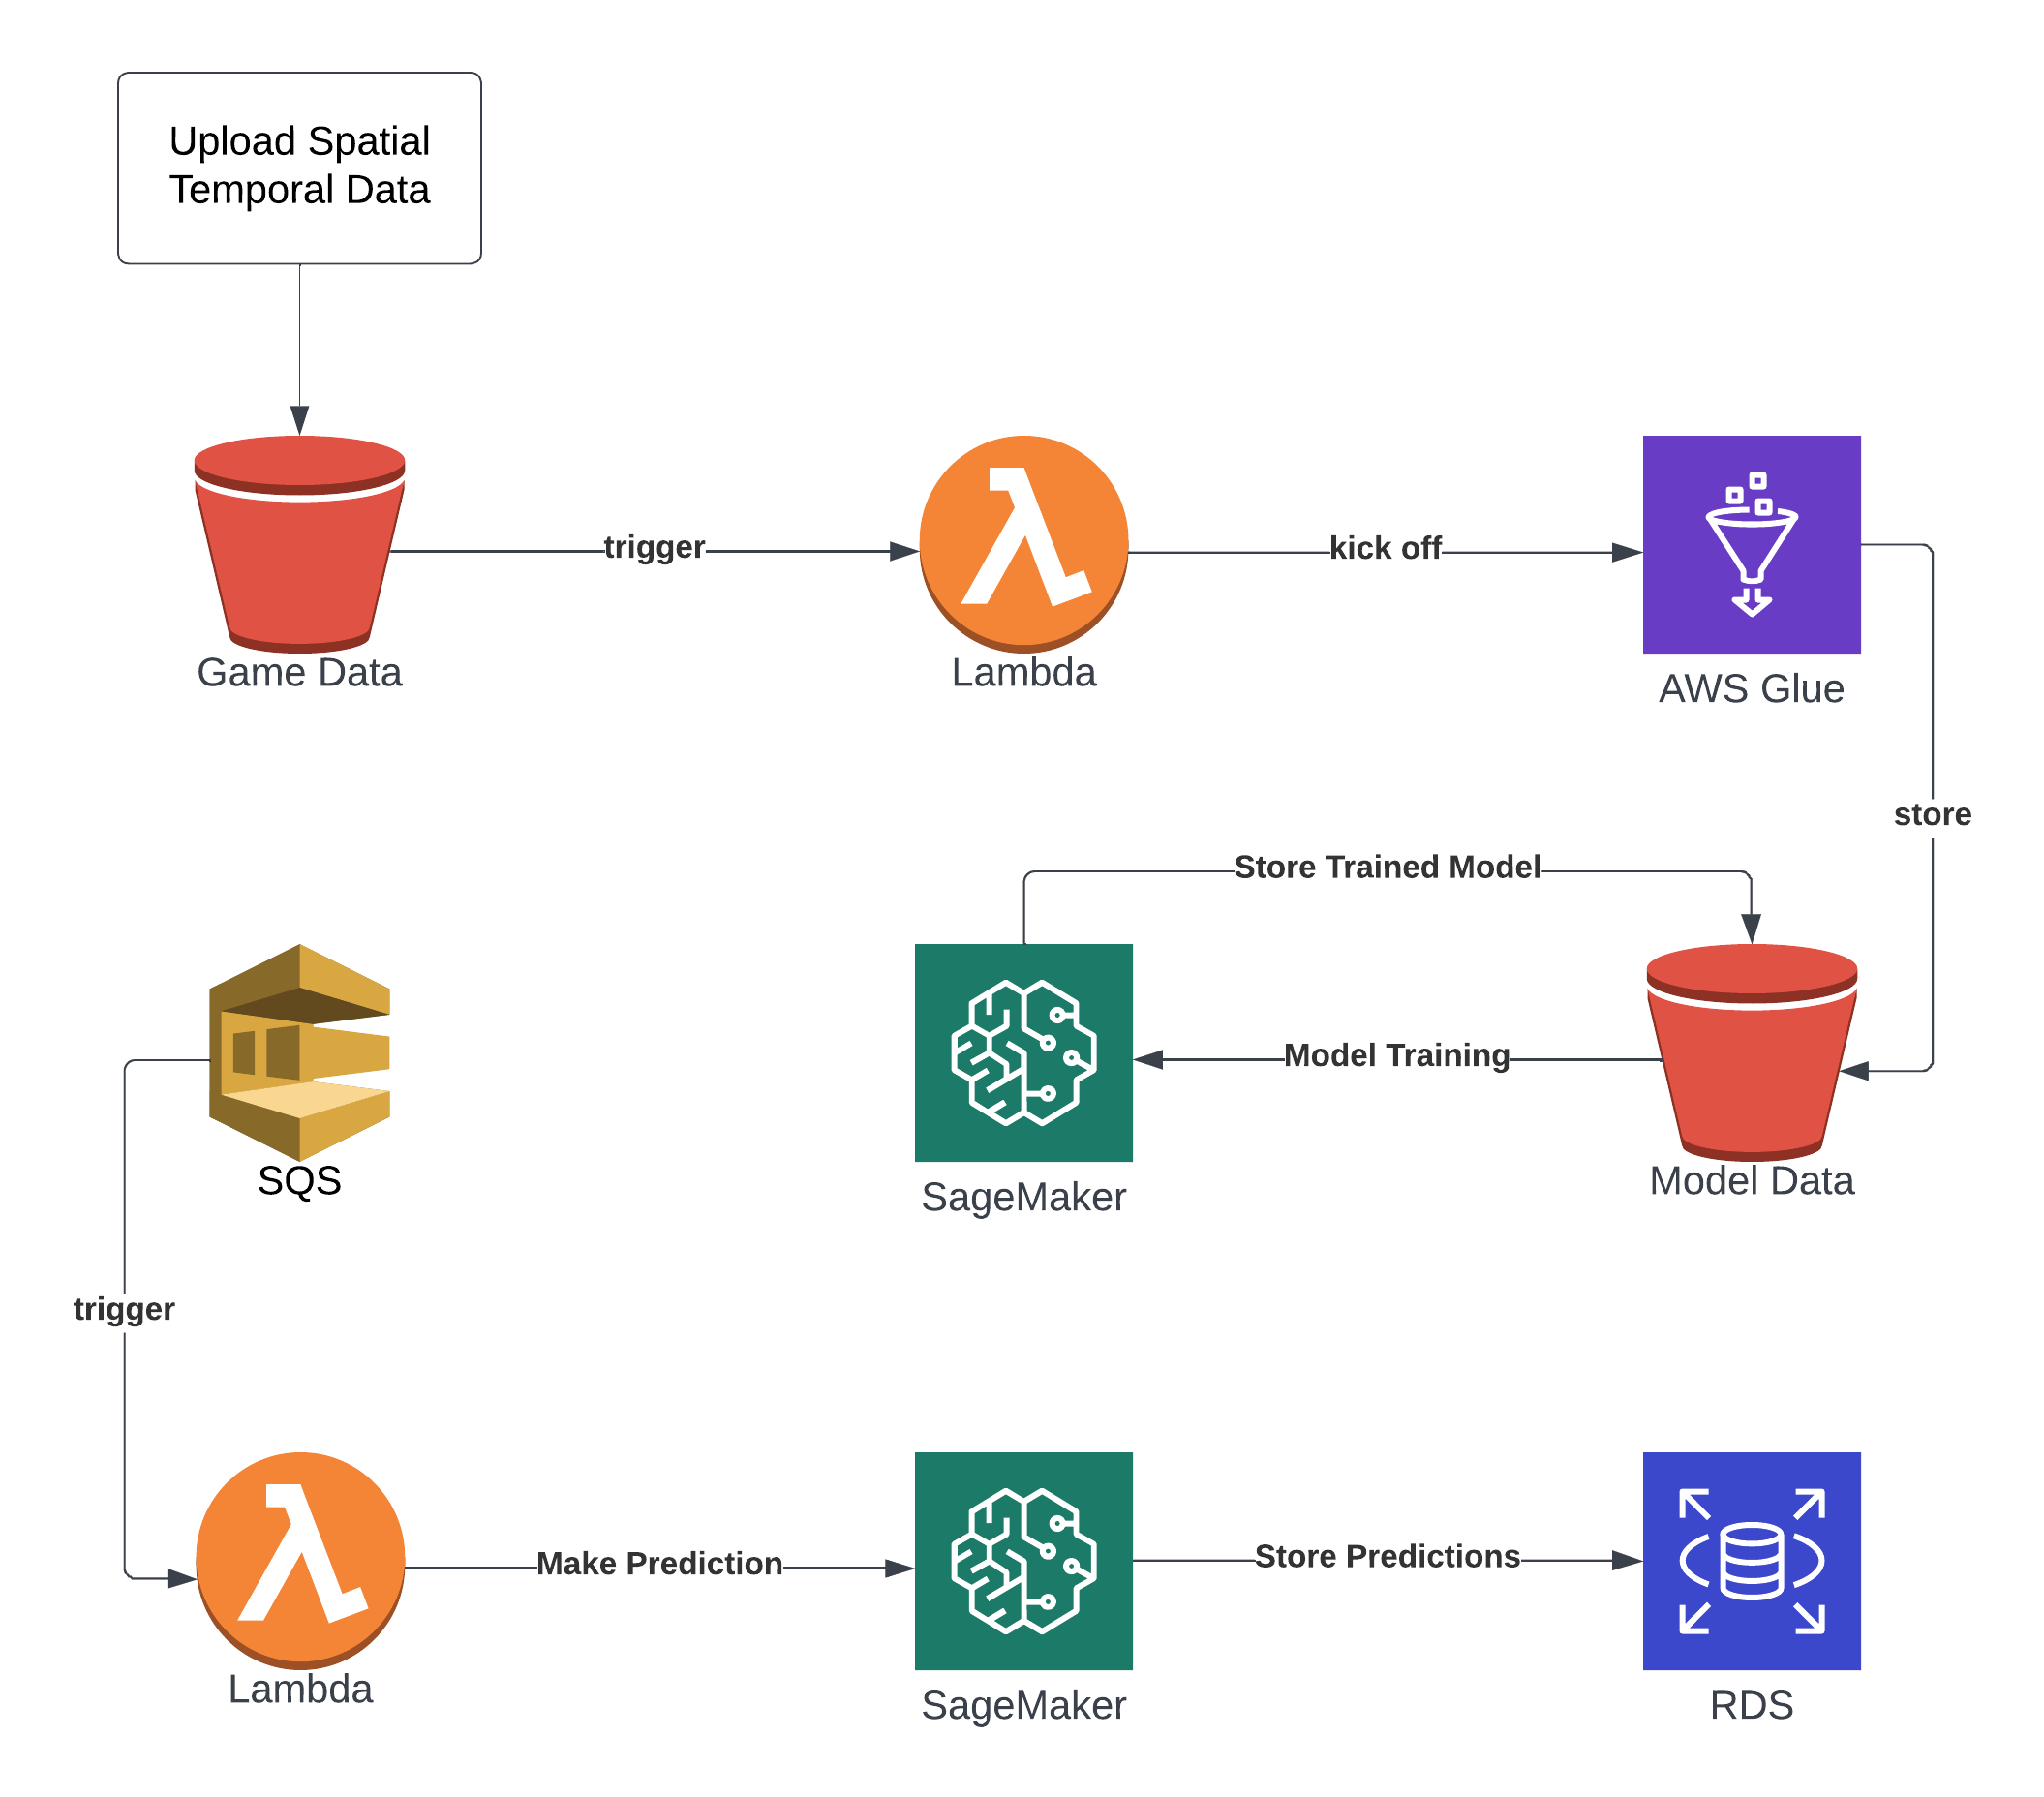

In [1]:
from IPython.display import Image, display 

display(Image(filename='architecture_diagram.png',width=800))

---

### Workflow:

1) **Game Data Storage (Amazon S3)**: The high frame-rate data for each game is stored in an Amazon S3 bucket.

2) **ETL (AWS Glue)**: AWS Glue is used to extract the game data from S3, transform it into a suitable format for model training and load it into SageMaker.

3) **Model Training (Amazon SageMaker)**: Amazon SageMaker is used for initial model training. The trained model parameters are stored in Amazon S3.

4) **Game Processing Queue (Amazon SQS)**: Once the game data is available, a message is pushed to an Amazon SQS queue, which triggers the prediction service.

5) **Model Prediction (Amazon SageMaker, AWS Lambda)**: A Lambda function triggers a SageMaker prediction job when a new game is queued. The trained model parameters are loaded from Amazon S3 for each prediction job.

6) **Results and Metadata Storage (Amazon RDS)**: The results of the model prediction along with any relevant metadata are stored in an Amazon RDS database.

7) **Monitoring (Amazon CloudWatch)**: Amazon CloudWatch is used to monitor the SageMaker jobs, SQS queue, and Lambda function. It ensures that any issues are quickly identified and addressed.


## Reasoning

The architecture proposed is designed to be scalable, robust, and effective in addressing the given problem. The choice of Amazon S3 as a storage solution for game data and model parameters is influenced by its efficiency, cost-effectiveness, high durability, and availability. This ensures that the large volume of high frame-rate data per game is securely and readily available for processing.

To handle the processing of this data, AWS Glue is selected for its capabilities to perform extract, transform, and load (ETL) operations. It effectively prepares the raw game data for the subsequent model training phase in a format that the model can ingest.

For model training and prediction, Amazon SageMaker, a fully-managed service, is utilized. SageMaker provides a comprehensive suite of machine learning capabilities, allowing for distributed training and real-time predictions. With SageMaker, the burden of managing the underlying infrastructure is removed, enabling the focus to remain on the development and optimization of the model.

The workflow includes Amazon SQS which acts as a buffer, managing the flow of games for prediction and ensuring the prediction service is not overwhelmed. Additionally, AWS Lambda is employed to facilitate event-driven processing, thereby minimizing the delay between when game data is available and when the prediction commences.

In terms of storage, Amazon RDS offers a structured way to store and retrieve data. It provides the needed functionality to house the results of the model prediction and any relevant metadata.

Lastly, the monitoring of the entire architecture is crucial to the prompt identification and resolution of any issues. Amazon CloudWatch provides the necessary services to ensure that the operation of SageMaker jobs, SQS queue, and the Lambda function are closely observed.

The selected services are all part of AWS, ensuring seamless interoperability and reducing complexity compared to a multi-cloud approach. AWS services are known for their robust support for automation, which is an essential factor for a system processing high volumes of data. This combination of services provides a cohesive, efficient, and scalable solution to meet the requirements of the task.